# Analysis of the Kickstarter project

Kickstarter is an American based Public benefits corporation which helps to fund creative project through crowdfunding. The company's stated mission is to "help bring creative projects to life", more information can be found here https://en.wikipedia.org/wiki/Kickstarter . The dataset was gotten from the Kaggle site here: https://www.kaggle.com/kemical/kickstarter-projects.

### Exploratory data analysis and visualization

In [184]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
from datetime import datetime

In [185]:
# import the dataset
kickstarter = pd.read_csv('ks-projects-201801.csv')

In [186]:
# view the head of the dataframe
kickstarter.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [187]:
# Show basic statistics for the dataset
kickstarter.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [188]:
# Show information about the different columns
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [189]:
# what are the main states a competiton can attain ?
kickstarter['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined', 'suspended'], dtype=object)

Text(0.5,1,'Fig 1 : Countplot showing the different states a campaign can take.')

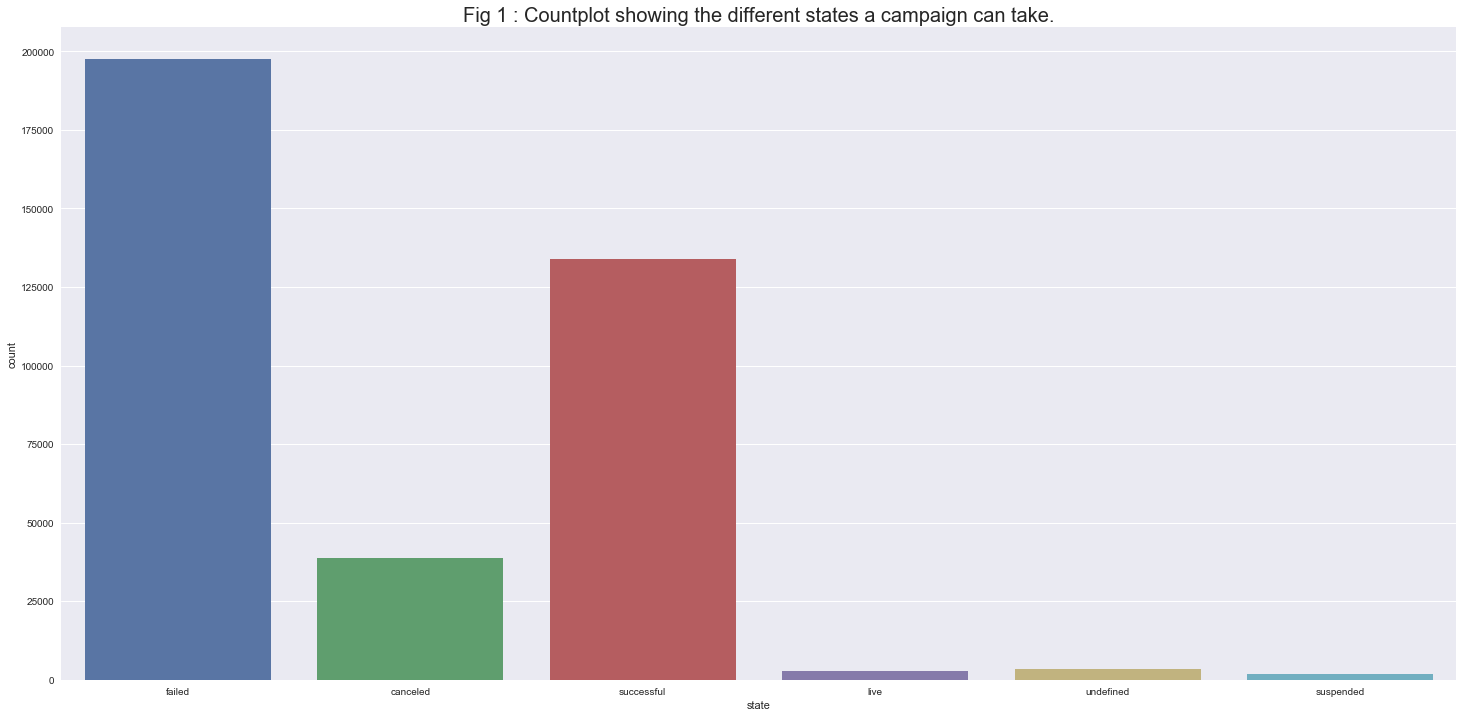

In [190]:
# Visualiza the data
plt.figure(figsize= (25,12))
sns.countplot(x = 'state', data = kickstarter)
plt.title('Fig 1 : Countplot showing the different states a campaign can take.', fontsize = 20)

In [191]:
# what are the main categories present?
kickstarter['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

A greater amount of projects fail to meet their goal as seen from the plot above.

We need to separate out the failed and successful projects for further analysis.

In [192]:
# Separate out the successful and failed projects
success = kickstarter[kickstarter['state']== 'successful']
failed = kickstarter[kickstarter['state']== 'failed']

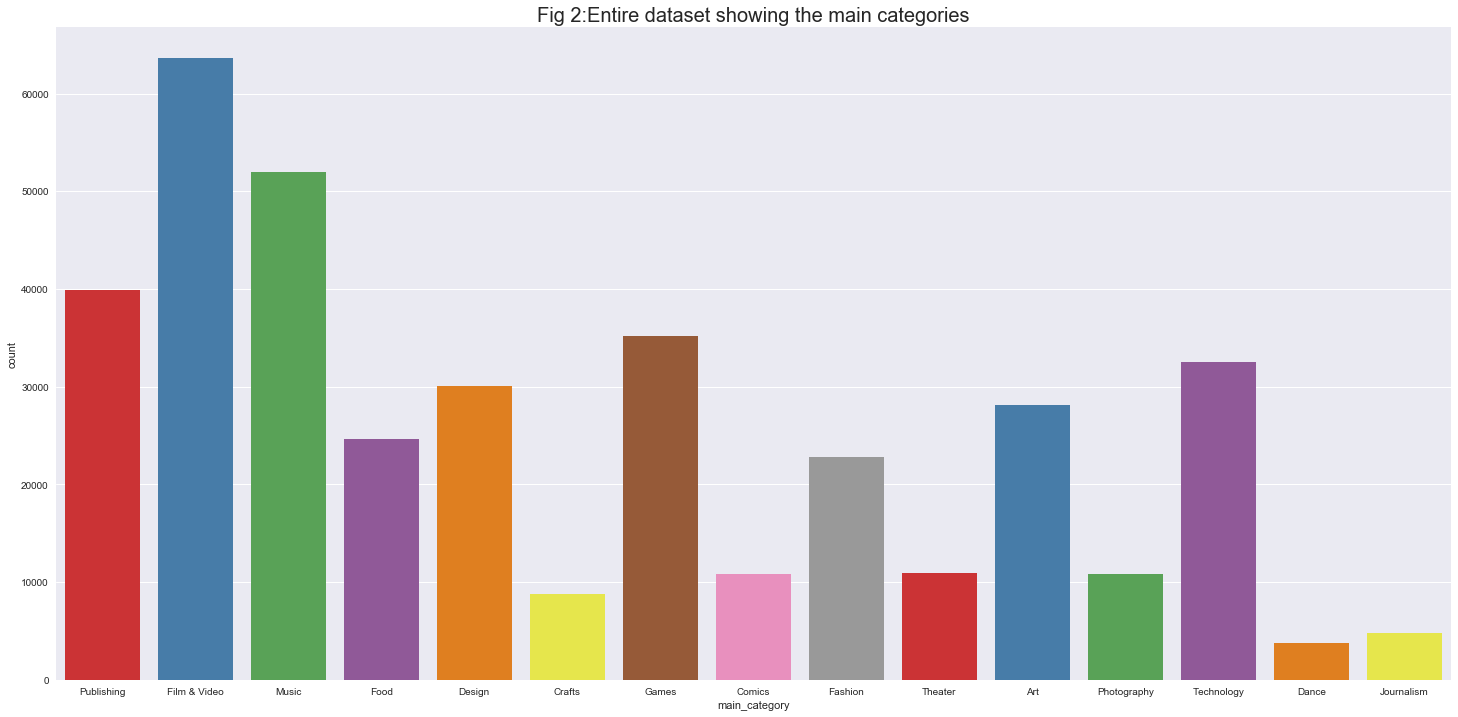

In [193]:
# Visualiza the data
plt.figure(figsize= (25,12))
plt.title('Fig 2:Entire dataset showing the main categories', fontsize = 20)
sns.countplot(x = 'main_category', data = kickstarter, palette='Set1' )

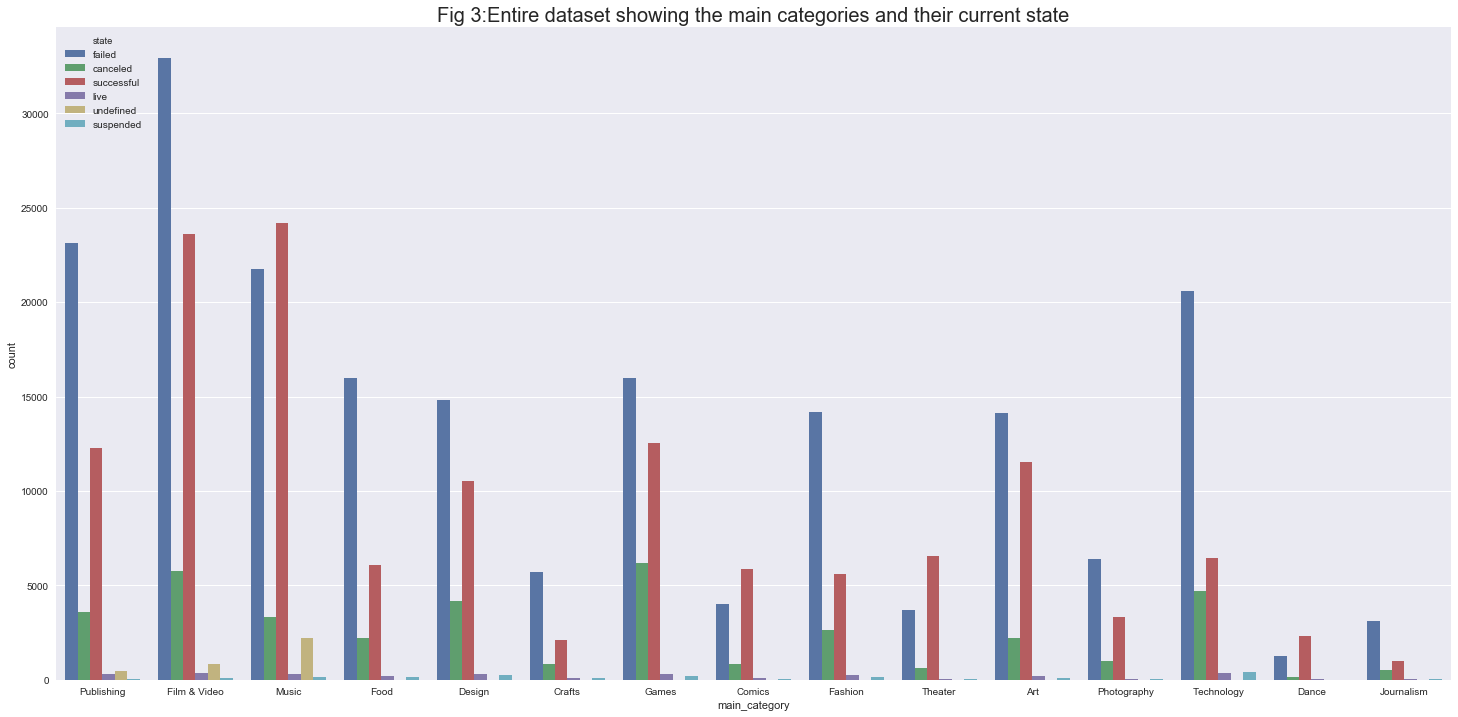

In [194]:
# Visualiza the data
plt.figure(figsize= (25,12))
plt.title('Fig 3:Entire dataset showing the main categories and their current state', fontsize = 20)
sns.countplot(x = 'main_category', data = kickstarter, hue ='state' )

The image above shows the main categories among the projects, a vast majority of projects are in the Film and Video category, next to Music then Publishing.

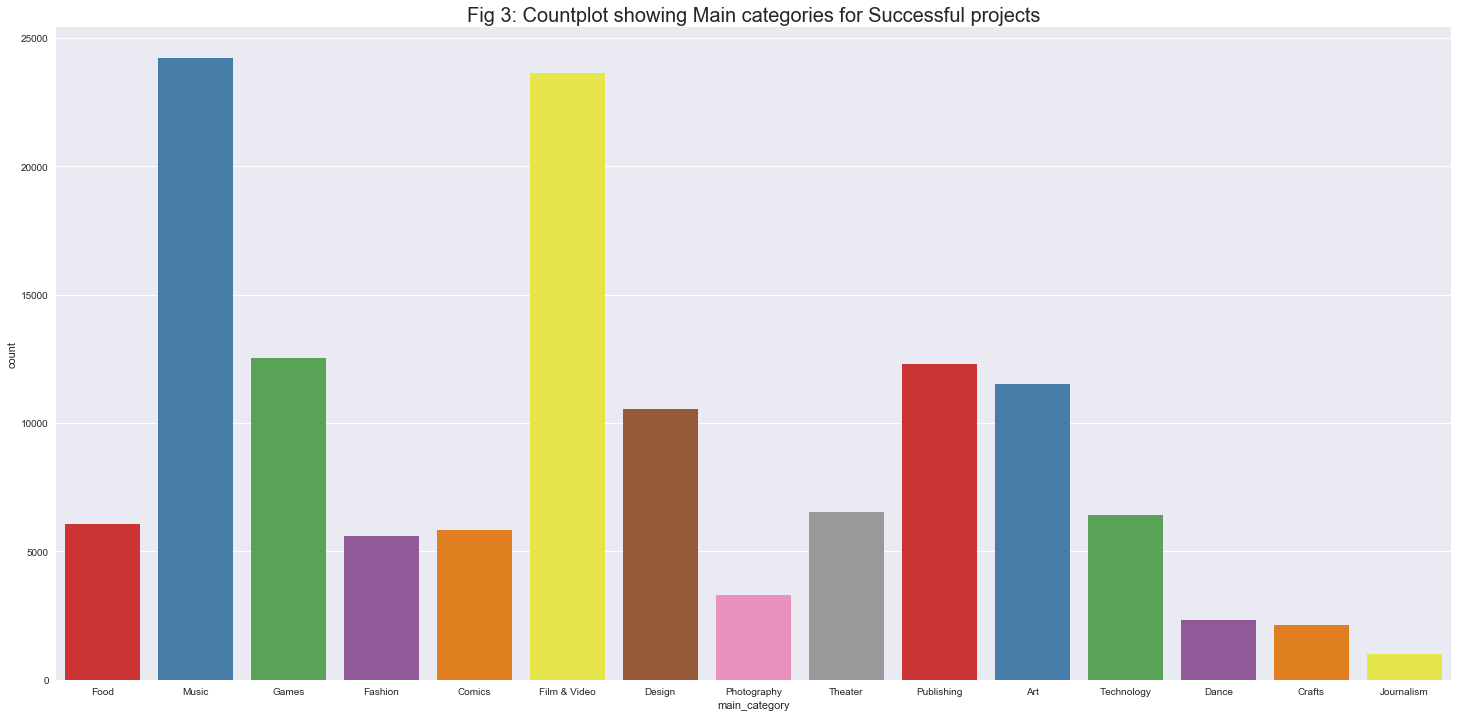

In [195]:
# What categories are more prominent among those successful?
plt.figure(figsize= (25,12))
plt.title('Fig 3: Countplot showing Main categories for Successful projects', fontsize = 20)
sns.countplot(x = success['main_category'], palette='Set1')

Amongst the successful projects, the category with the most winners are in Music, next to Film and Video and then Games.

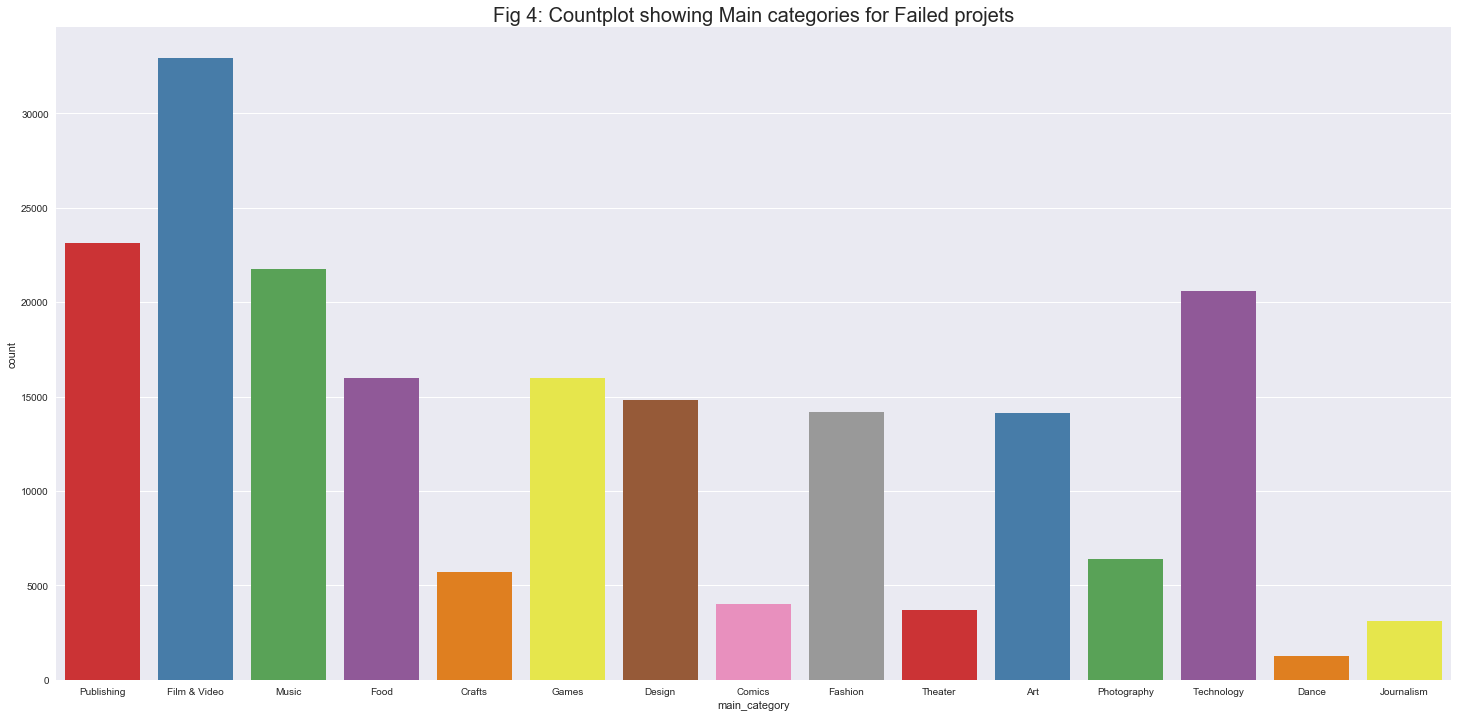

In [196]:
# What is the distribution of failed projects?
plt.figure(figsize= (25,12))
plt.title('Fig 4: Countplot showing Main categories for Failed projets', fontsize = 20)
sns.countplot(x = failed['main_category'], palette='Set1')

In [197]:
# what are the subcategories present?
kickstarter['category'].unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People', 'Art',
       'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware', 'Software',
       'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear', 'Festivals',
       'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

What countries do these projects come from?

In [198]:
# what are the countries present?
kickstarter['country'].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

Text(0.5,1,'Fig 5: Countplot showing countries ')

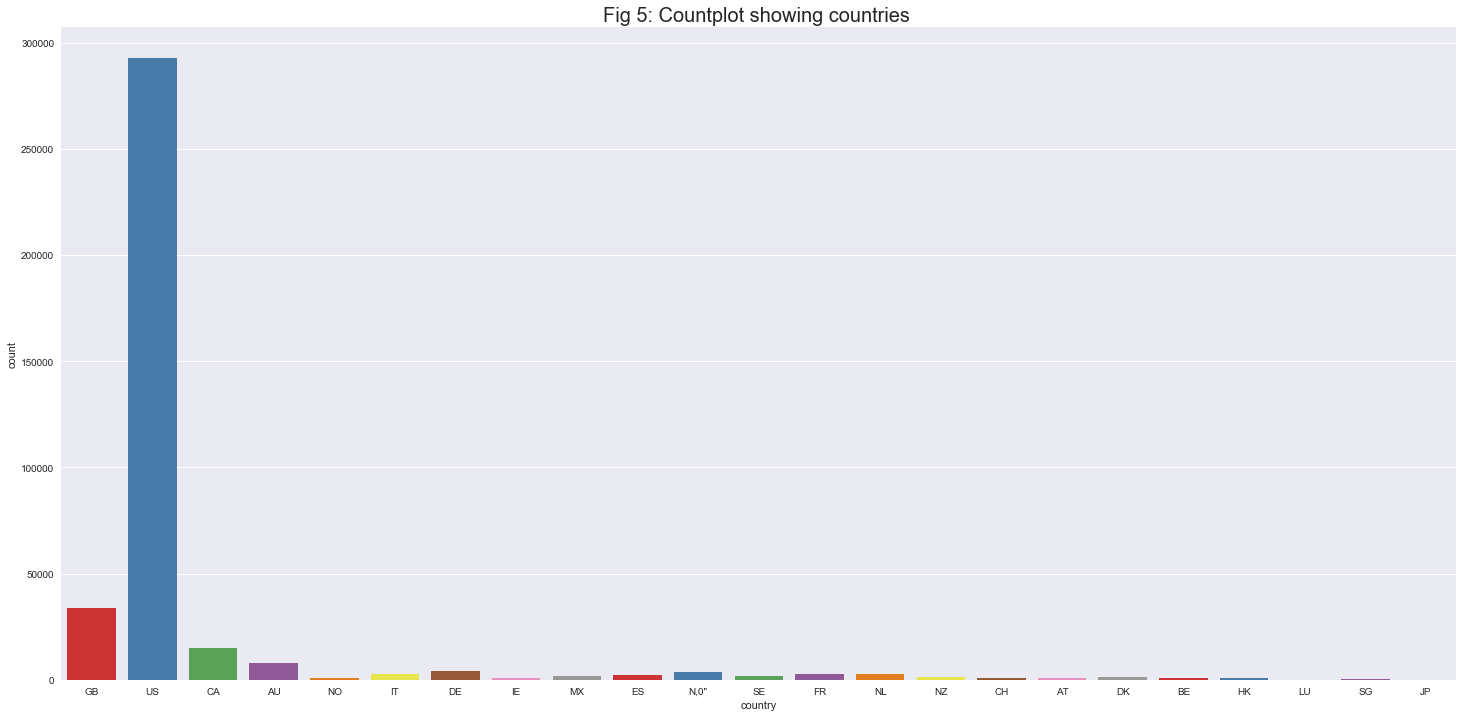

In [199]:
# Visualiza the countries present in the data
plt.figure(figsize= (25,12))
sns.countplot(x = kickstarter['country'], palette='Set1')
plt.title('Fig 5: Countplot showing countries ', fontsize = 20)

For this analysis, we would concern ourselves with just the cases where the project was successful or when it failed.

In [200]:
# merge the successful and failed projects together in a dataframe
kick_data = pd.concat([success, failed])

In [201]:
# Show basic statistics
kick_data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.316750e+05,3.316750e+05,3.316750e+05,331675.000000,3.314650e+05,3.316750e+05,3.316750e+05
mean,1.074271e+09,4.425157e+04,1.058400e+04,116.381581,7.684569e+03,9.943461e+03,4.151000e+04
std,6.191924e+08,1.117917e+06,1.015917e+05,965.427268,8.320938e+04,9.673293e+04,1.108930e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.371725e+08,2.000000e+03,5.000000e+01,2.000000,2.500000e+01,5.000000e+01,2.000000e+03
50%,1.074573e+09,5.000000e+03,7.820000e+02,15.000000,5.020000e+02,7.880000e+02,5.000000e+03
75%,1.609844e+09,1.500000e+04,4.657000e+03,63.000000,3.421000e+03,4.608000e+03,1.500000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In order to prepare our data for machine learning, we need to create a column which would have a value of 1 for successful and 0 for failed.

In [202]:
def success(df):
    if df['state']== 'successful':
        return 1
    else:
        return 0

In [203]:
kick_data['Successful?']= kick_data.apply(func = success, axis = 1)

Create a scatterplot showing the relationship between the amount pledged and the number of backers

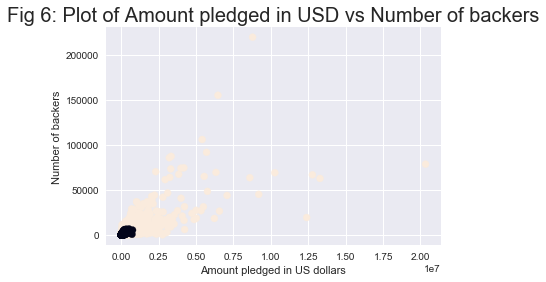

In [204]:
plt.scatter(x = kick_data['usd_pledged_real'], 
            y = kick_data['backers'], c = kick_data['Successful?'])
plt.xlabel('Amount pledged in US dollars')
plt.ylabel('Number of backers')
plt.title('Fig 6: Plot of Amount pledged in USD vs Number of backers', fontsize = 20)
plt.show()

There is a direct relationship between the amount pledged in USD and the Number of Backers.

We need to determine the number of days that each campaign lasted.

In [205]:
kick_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 5 to 378660
Data columns (total 16 columns):
ID                  331675 non-null int64
name                331672 non-null object
category            331675 non-null object
main_category       331675 non-null object
currency            331675 non-null object
deadline            331675 non-null object
goal                331675 non-null float64
launched            331675 non-null object
pledged             331675 non-null float64
state               331675 non-null object
backers             331675 non-null int64
country             331675 non-null object
usd pledged         331465 non-null float64
usd_pledged_real    331675 non-null float64
usd_goal_real       331675 non-null float64
Successful?         331675 non-null int64
dtypes: float64(5), int64(3), object(8)
memory usage: 53.0+ MB


The launched and deadline column data types are of the type object, we need them to be of the type datetime.

In [206]:
# Convert both columns to datetime
for i in ['launched','deadline']:
    kick_data[i] = pd.to_datetime(kick_data[i])
    

In [207]:
kick_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 5 to 378660
Data columns (total 16 columns):
ID                  331675 non-null int64
name                331672 non-null object
category            331675 non-null object
main_category       331675 non-null object
currency            331675 non-null object
deadline            331675 non-null datetime64[ns]
goal                331675 non-null float64
launched            331675 non-null datetime64[ns]
pledged             331675 non-null float64
state               331675 non-null object
backers             331675 non-null int64
country             331675 non-null object
usd pledged         331465 non-null float64
usd_pledged_real    331675 non-null float64
usd_goal_real       331675 non-null float64
Successful?         331675 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(3), object(6)
memory usage: 53.0+ MB


In [208]:
# Create a new column called duration
kick_data['Duration']=kick_data['deadline']-kick_data['launched']

In [209]:
kick_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 5 to 378660
Data columns (total 17 columns):
ID                  331675 non-null int64
name                331672 non-null object
category            331675 non-null object
main_category       331675 non-null object
currency            331675 non-null object
deadline            331675 non-null datetime64[ns]
goal                331675 non-null float64
launched            331675 non-null datetime64[ns]
pledged             331675 non-null float64
state               331675 non-null object
backers             331675 non-null int64
country             331675 non-null object
usd pledged         331465 non-null float64
usd_pledged_real    331675 non-null float64
usd_goal_real       331675 non-null float64
Successful?         331675 non-null int64
Duration            331675 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(5), int64(3), object(6), timedelta64[ns](1)
memory usage: 55.5+ MB


In [210]:
# Extract the days column from the duration timedelta object
kick_data['Number of days']= kick_data['Duration'].dt.days  

Create visualization for barplots of USD pledged, Number of days, goal and backers as a function of the main category.

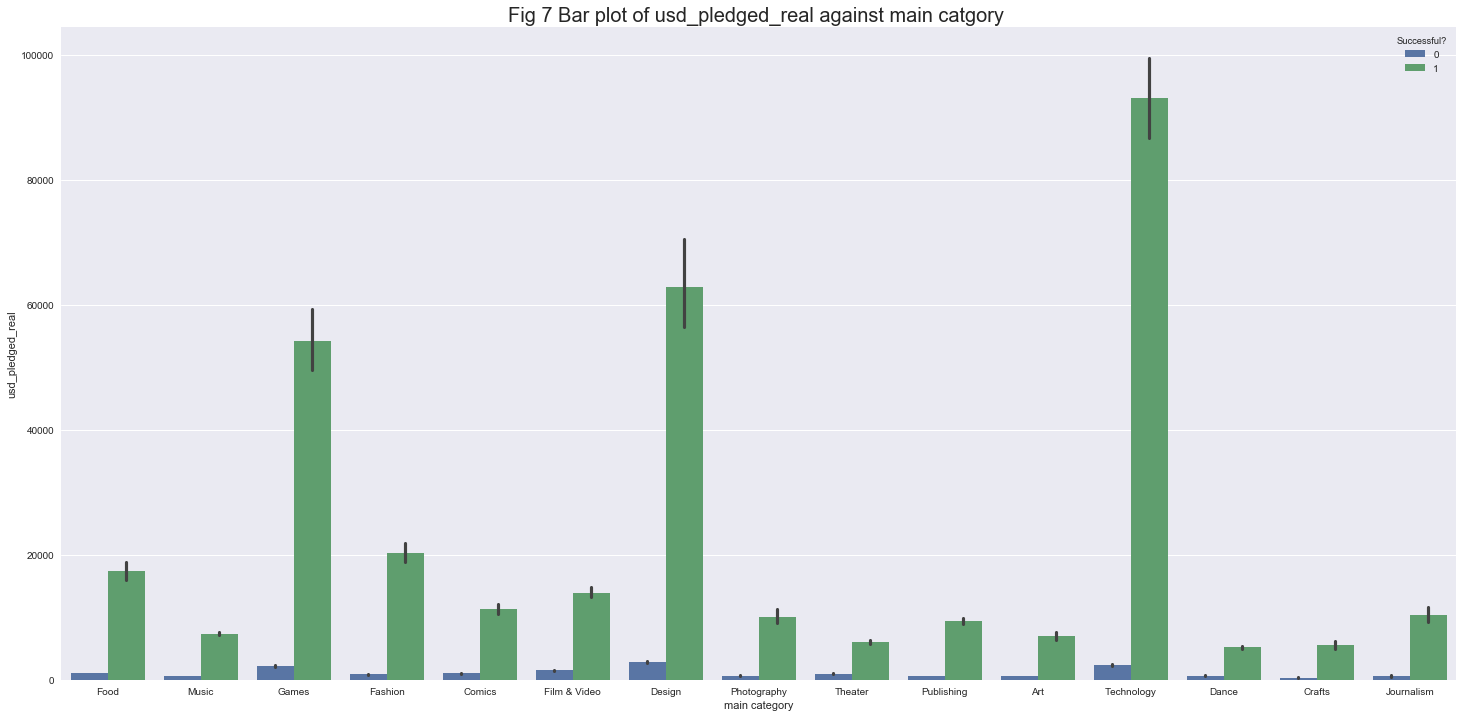

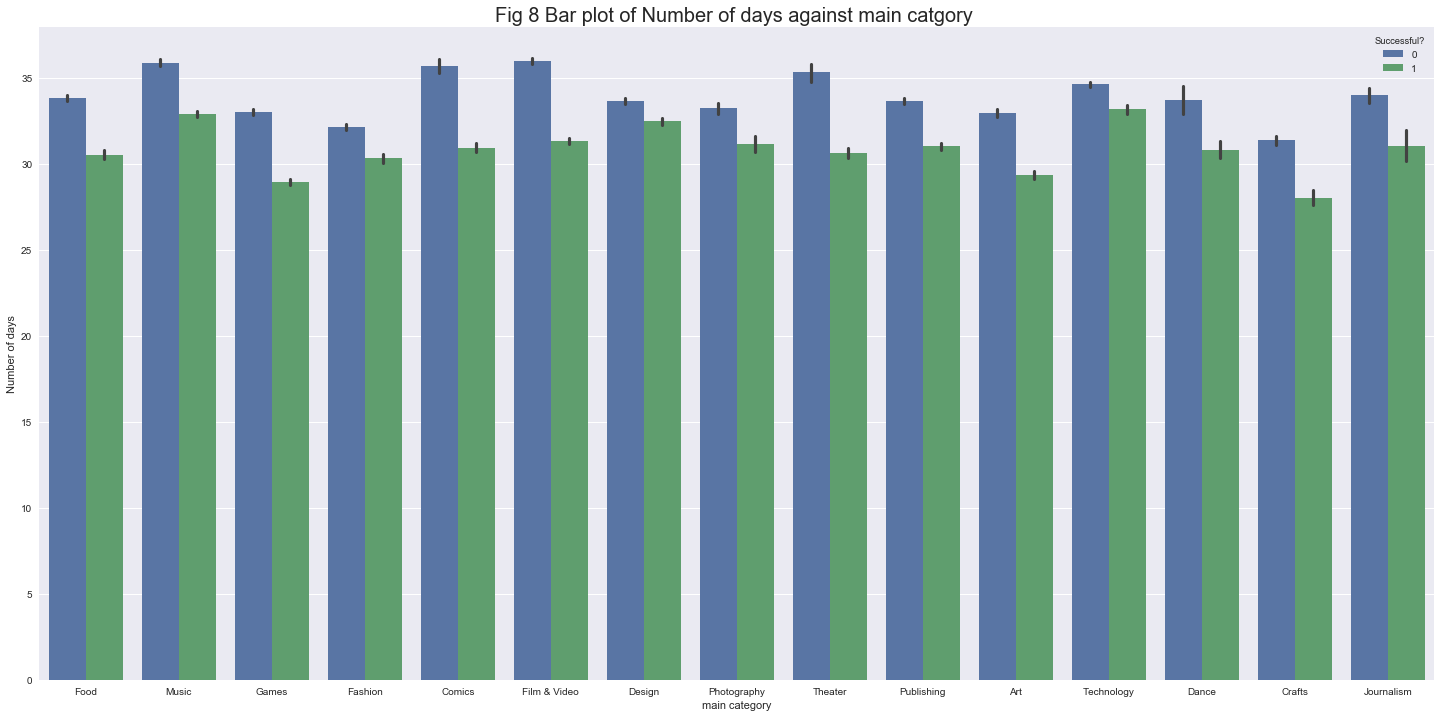

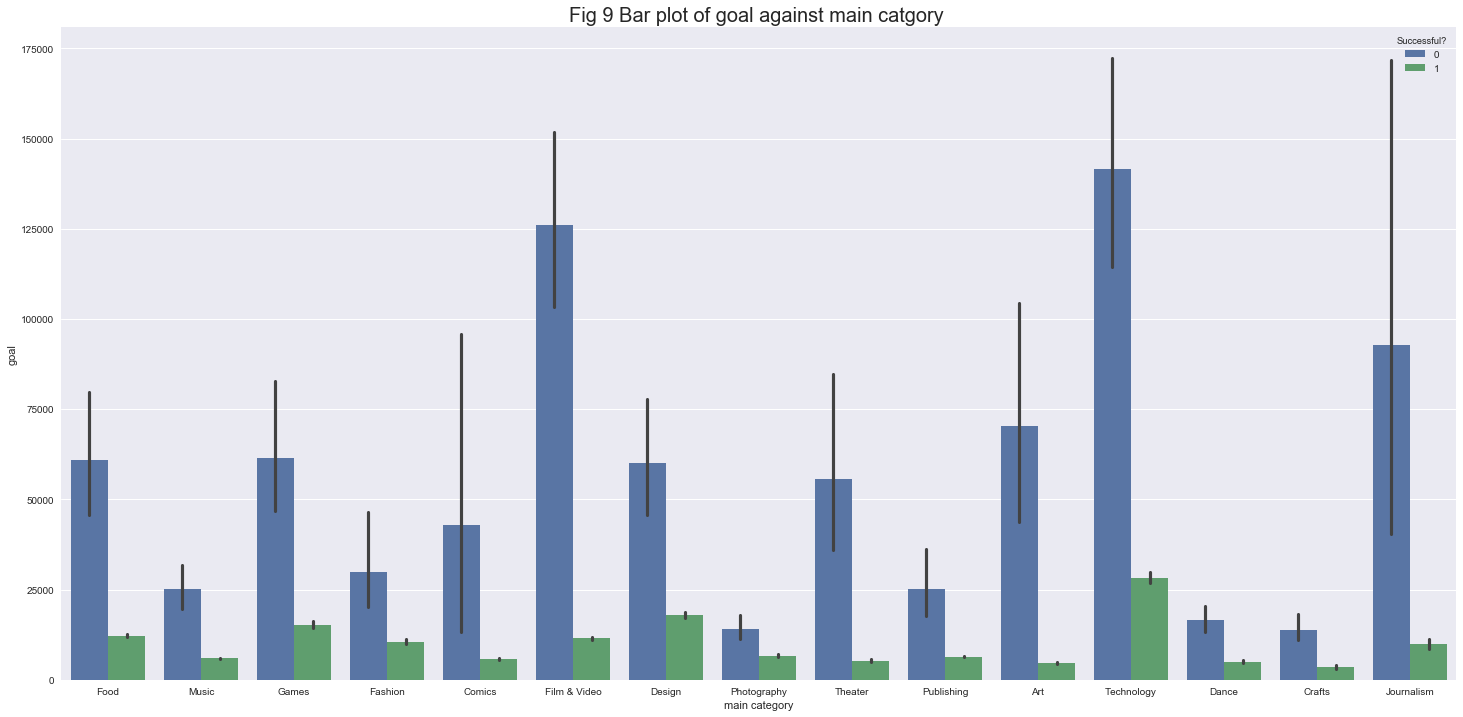

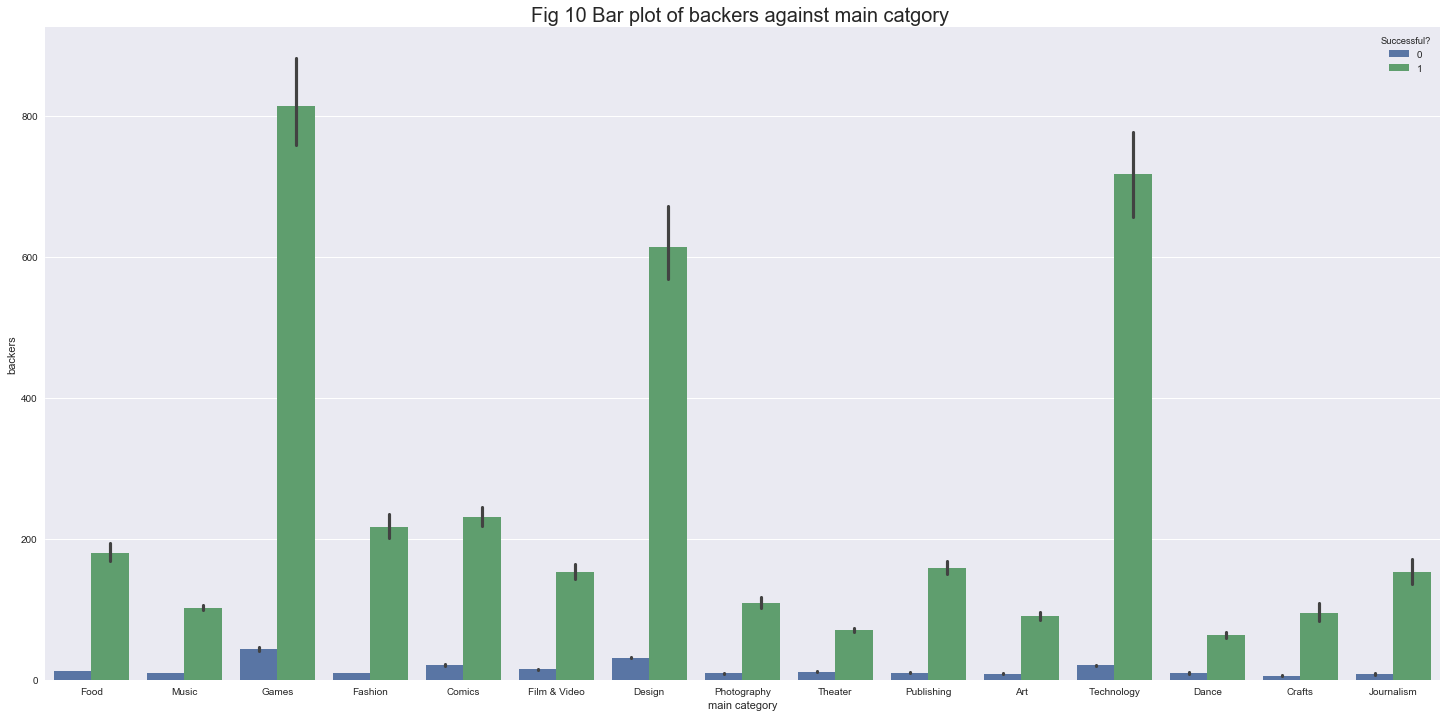

In [211]:
n = 6
for column in ['usd_pledged_real','Number of days','goal','backers']:
    n = n+1
    plt.figure(figsize= (25,12))
    sns.barplot(x = 'main_category',y = column,data = kick_data, hue = 'Successful?')
    plt.xlabel('main category')
    plt.ylabel(column)
    plt.title('Fig ' + str(n) +' Bar plot of '+ column + ' against main catgory ', fontsize = 20)


# Logisitic Regression

In [212]:
from sklearn.linear_model import LogisticRegression

In [213]:
from sklearn.cross_validation import train_test_split

In [214]:
# Check for missing values
kick_data.isnull().sum()

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
Successful?           0
Duration              0
Number of days        0
dtype: int64

In [216]:
kick_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Successful?,Duration,Number of days
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.00,52375.00,50000.00,1,34 days 10:21:33,34
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.00,1205.00,1000.00,1,19 days 05:29:16,19
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,successful,100,US,12700.00,12700.00,12500.00,1,29 days 17:17:02,29
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,successful,761,GB,57763.78,121857.33,6469.73,1,27 days 04:15:42,27
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.0,successful,7,US,250.00,250.00,250.00,1,14 days 09:48:28,14


In [217]:
kick_data.drop(labels=['usd pledged','name'], inplace=True, axis = 1)

In [218]:
kick_data.isnull().sum()

ID                  0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
Successful?         0
Duration            0
Number of days      0
dtype: int64

In [219]:
kick_data.columns

Index(['ID', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real', 'Successful?', 'Duration',
       'Number of days'],
      dtype='object')

In [220]:
# Split the dataset into X and y
y = kick_data['Successful?']
X = kick_data[['usd_pledged_real','Number of days','usd_goal_real','backers']]

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [222]:
Lr = LogisticRegression()

In [223]:
Lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [224]:
y_pred = Lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(Lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [225]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[65228   134]
 [    0 44091]]


# Conclusion

From Fig 7, it can be seen that on average the amount pledged in each category is many times more for successful projects than for projects that failed. This makes a lot of sense since the success of a campaign depends on its ability to meet and/or surpass its goal. 

The duration of a campaign has a significant effect on the success of a campaign, usually, the shorter the campaign period, the more likely it is to succeed. Usually, a short campaign period brings a certain sense of urgency in raising the funds. On average, as seen from Fig 8, the successful projects had a campaign length of about 33 days.While, the failed projects on the other hand tend to have a longer campaign period in each category.

Fig 9 shows that projects that failed to meet their goal tend to have a much larger goal amount as compared to successful projects which tend to have a much lower and achievable goal amount. Accross all the categories, the technology category tend to have a much larger goal when compared to the other categories, next only to "Film and Video' Category.

The number of backers has a positive relationship with the success of a campaign, the larger the number of backers, the more likely it is to succeed. The 'Games' category tends to have the most number of backers next to technology category, however, they tend to still have the lower representation among successful projects when compared to Music category as seen in Fig 3.

# Future work

Several other factors would be investigated in future revisions. The effect of location can be investigated and the potential effect of the month in which the campaign was launched. These might help increase the accuracy of the logistic regression model from a 92% to something higher.